In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
aqdf = pd.read_csv("AOQ_out.tsv", delimiter="\t")

In [55]:
sum_A2 = aqdf.groupby("ANTENNA2").sum()
sum_A1 = aqdf.groupby("ANTENNA1").sum()
tot_sum = sum_A1+ sum_A2 

In [19]:
tot_sum.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            566, 567, 568, 569, 570, 571, 572, 573, 574, 575],
           dtype='int64', name=u'ANTENNA1', length=576)

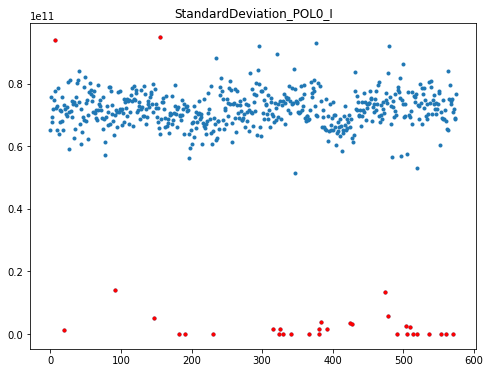

num outliers: 32


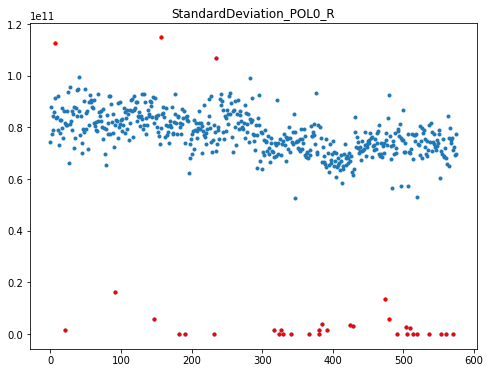

num outliers: 33


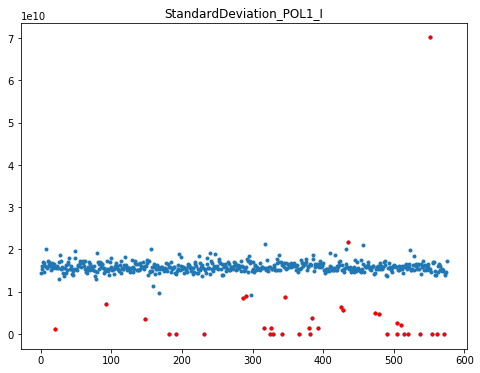

num outliers: 35


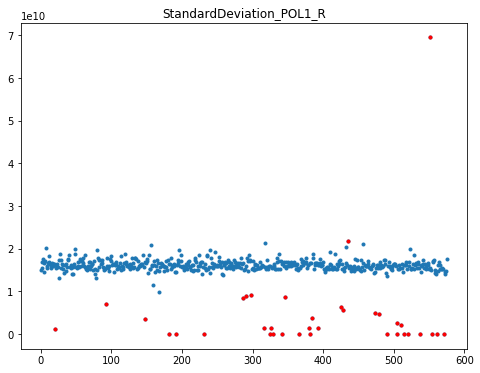

num outliers: 36


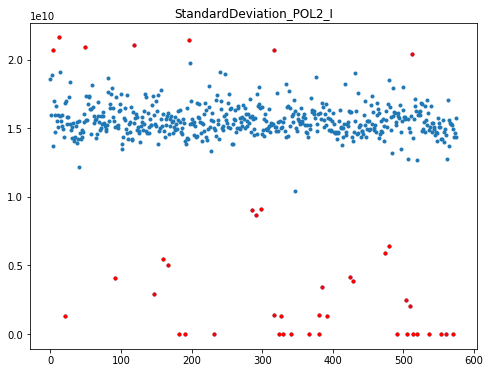

num outliers: 42


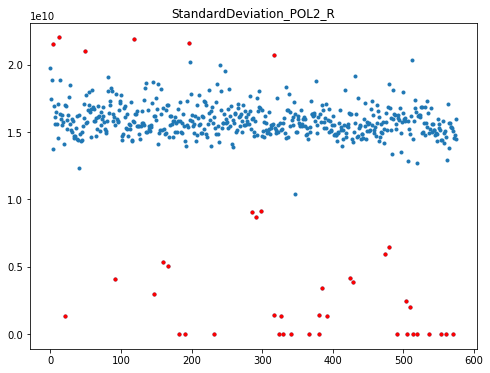

num outliers: 41


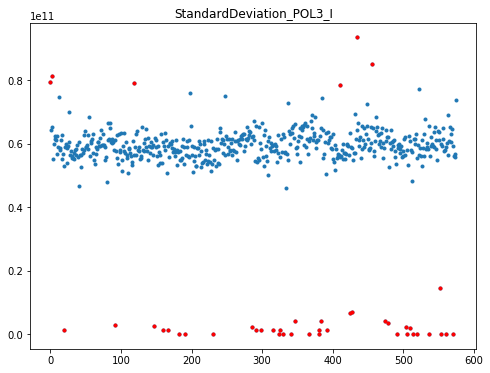

num outliers: 43


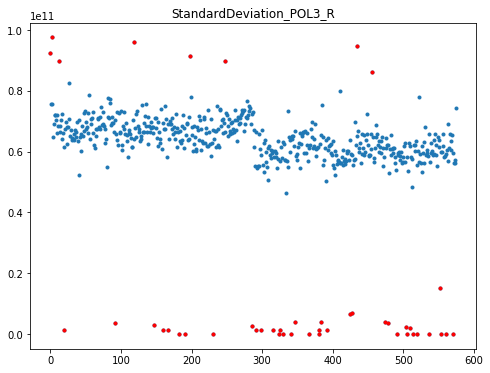

num outliers: 45
[  0   3   7  12  20  49  92 119 147 156 159 167 182 191 196 198 231 235
 247 286 291 298 316 317 324 326 329 341 346 366 380 381 384 392 410 425
 428 435 456 474 479 491 504 505 510 512 514 520 537 552 554 561 571] len: 53
output string:
0,3,7,12,20,49,92,119,147,156,159,167,182,191,196,198,231,235,247,286,291,298,316,317,324,326,329,341,346,366,380,381,384,392,410,425,428,435,456,474,479,491,504,505,510,512,514,520,537,552,554,561,571


In [56]:
badstations = np.array([], dtype="int")

for key in tot_sum.keys()[2:]:
    plt.figure(figsize=(8,6))
    plt.title(key)
    plt.plot(tot_sum[key],".")
    outliers = np.abs(tot_sum[key] - np.mean(tot_sum[key])) > 1.5*np.std(tot_sum[key])
    plt.plot(tot_sum[key][outliers], ".", c="r")
    badstations = np.append(badstations, tot_sum[key][outliers].index)
    plt.show()
    print "num outliers:",len(tot_sum[key][outliers])
    
all_badstations = np.unique(badstations)

print all_badstations, "len:", len(all_badstations)
print "output string:"
print ','.join(np.array(all_badstations, dtype=str))

In [50]:
# bad station list via manual inspection len: 41

len([20,147,159,182,191,231,316,324,326,329,341,\
     366,380,381,384,392,425,428,437,474,479,491,\
     504,505,510,514,520,532,537,551,554,561,570,\
     571,92,167,286,291,298,346,552])





41

# Script:

TODO: 
< > Automate aoquality query with Popen
< > Test sigma level on other data set, vary dataset length?
< > Write out to Antflag.parset

In [ ]:
import pandas as pd
import numpy as np

# Get output of $ aoquality query_b StandardDeviation SB315-202007100001-lba_outer.vis.ms | tee AOQ_out.tsv
aqdf = pd.read_csv("AOQ_out.tsv", delimiter="\t")


# Get individual antenna statistics, sum seems to give best results on tested data
sum_A2 = aqdf.groupby("ANTENNA2").sum()
sum_A1 = aqdf.groupby("ANTENNA1").sum()
tot_sum = sum_A1+ sum_A2 

badstations = np.array([], dtype="int")

for key in tot_sum.keys()[2:]:
    # for each statistic, get the X sigma outliers: (sigma 1.5 seems good on tested data)
    outliers = np.abs(tot_sum[key] - np.mean(tot_sum[key])) > 1.5*np.std(tot_sum[key])
    badstations = np.append(badstations, tot_sum[key][outliers].index)

    
# take all stations which were outliers in any statistic 
all_badstations = np.unique(badstations)

# output list with preflagger.baseline=1,2,...,n-1,n format 
print ','.join(np.array(all_badstations, dtype=str))

In [57]:
pwd 


u'/home/mkuiack1'